In [1]:
# Importo librerías
from numpy import mean, std
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# Defino un dataset con sólo 1 feature (1 variable X)
X, y = make_regression(n_samples=50, n_features=1, n_informative=15, noise=20, random_state=2)

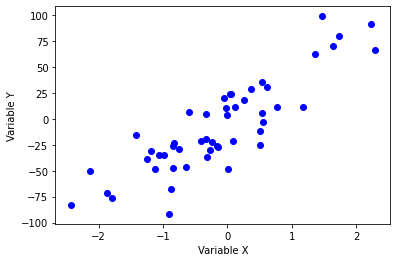

In [3]:
plt.scatter(X, y, color = 'blue')   
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.show()

En el siguiente código se muestra como realizar una validación pero esta vez sin optimizar los parámetros del modelo. Para optimizar los parámetros se utilizaba GridSearchCV, que prueba todas las combinaciones de los parámetros (GridSearch) validándolos con validación cruzada (CV de Cross Validation). En este caso simplemente se validan los parámetros por defecto con la función RepeatedKFold

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [4]:
# Defino un modelo
model = RandomForestRegressor()

In [5]:
# Evalúo el modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# Obtengo una métrica de rendimiento
print(u'Obtengo el error absoluto medio (MAE): %.3f, desviación %.3f' % (mean(n_scores), std(n_scores)))

Obtengo el error absoluto medio (MAE): -19.352, desviación 6.008


In [11]:
X_grid = np.arange(min(X), max(X), 0.01)                
X_grid = X_grid.reshape((len(X_grid), 1)) 


In [7]:
# Ajusto el modelo a los datos
model.fit(X,y)
y_prediccion = model.predict(X_grid)

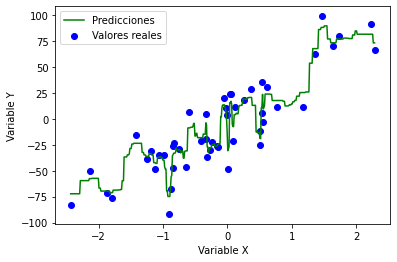

In [8]:
# Visualización de los resultados del Random Forest Regressor
plt.scatter(X, y, color = 'blue', label="Valores reales")   
plt.plot(X_grid, y_prediccion, color = 'green', label="Predicciones")  
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.legend()
plt.show()